In [143]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [144]:
# Read and load loan data from 'loan.csv' file.
loan_data = pd.read_csv('loan.csv')

In [145]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [146]:
loan_data.shape

(39717, 111)

In [147]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [148]:
# Check all columns for null values.
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

There are lot of columns with NULL values, we can drop these columns.

In [149]:
# Dropping all columns who have all value as null.
loan_data.dropna(axis=1, how='all', inplace=True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [150]:
loan_data.shape

(39717, 57)

There are now 57 columns, earlier there were 111 columns, we dropped all NULL value columns

Find all single value columns.

In [151]:
# Iterating through all columns and filtering single valued columns.
all_columns = loan_data.columns.to_list()
single_valued_columns = []
for col in all_columns:
    if loan_data[col].nunique() == 1:
        single_valued_columns.append(col)

single_valued_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

Drop all single value columns since they are not useful in our analysis.

In [152]:
# Dropping all single valued columns.
loan_data.drop(single_valued_columns, axis=1, inplace=True)

In [153]:
loan_data.shape

(39717, 48)

Now we have 48 columns after dropping all null value and single value columns.

In [154]:
# Iterating through all columns and identifying those columns that have all unique values.
all_columns = loan_data.columns.to_list()
id_columns = []
for col in all_columns:
    if loan_data[col].nunique() == loan_data.shape[0]:
        id_columns.append(col)

id_columns

['id', 'member_id', 'url']

Remove the ID columns

In [155]:
# Removing all id columns.
loan_data.drop(id_columns, inplace=True, axis=1)
loan_data.shape

(39717, 45)

### There are some columns that corresponds to post approval of loan that are not useful for our analysis.

<ul>
<li>We want to analyse details of user that are driving factor for loan defaults before approving loan.</li>
<li>We will remove all columns that will come in this category.</li>
<li>Some columns that are not directly helpful can be removed such as "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".</li>
<li>"desc" is not useful since its text based column.</li>
<li>"out_prncp_inv" , "total_pymnt_inv" are ret relavant for analysys.</li>
<li>"funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.</li>
</ul>

#### List of post-approval features
<ul>
<li>delinq_2yrs</li>
<li>revol_bal</li>
<li>out_prncp</li>
<li>total_pymnt</li>
<li>total_rec_prncp</li>
<li>total_rec_int</li>
<li>total_rec_late_fee</li>
<li>recoveries</li>
<li>collection_recovery_fee</li>
<li>last_pymnt_d</li>
<li>last_pymnt_amnt</li>
<li>next_pymnt_d</li>
<li>mths_since_last_delinq</li>
<li>mths_since_last_record</li>
</ul>

In [156]:
irrevalant_columns = ["title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc", "out_prncp_inv", "total_pymnt_inv", "funded_amnt"]
post_approval_columns = ["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d",  "mths_since_last_delinq", "mths_since_last_record"]

loan_data.drop(irrevalant_columns+post_approval_columns, axis=1, inplace=True)
loan_data.shape

(39717, 22)

In [157]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

We want to analyse the data to see who is likely to default and we can only use the data where loan is fully paid or defaulted, ignoring the ongoing loans.

In [158]:
# Dropping all rows who has loan_status as "Current" since its not useful for our analysis.
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Find out missing values

In [159]:
# Find percentage of missing values.
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [160]:
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

### Handling and filling missing values.

<ul>
<li>Three columns "emp_length", "revol_util", "pub_rec_bankruptcies" have missing values.</li>
<li>We will analyse these columns and fill out missing values</li>
</ul>

In [161]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  earliest_cr_line   

Fill missing values in "emp_length" column.

In [162]:
loan_data['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

The column "emp_length" is of type object and most frequent value is "10+ years", so we will use this value for filling missing values.

In [163]:
# Filling missing values in emp_length with the most frequent value.
loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace=True)
loan_data['emp_length'].isna().sum()

0

In [164]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

Standardadizing the data
Some columns need to be cleaned and formatted e.g.
<ul>
<li>"int_rate" has "%" sign included and we need to remove this and convert to numeric type.</li>
<li>"emp_length" contains values such as "10+ years" , "< 1 year>", these value need to be normalized.</li>
<li>"revol_util" is of type object, need to be converted to numeric.</li>
<li>"term" has only two variables and can be converted to int and can be treated as categorcal variable.</li>
</ul>

In [165]:
# Convert "int_rate" to numeric after removing "%".
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].apply(lambda x: x.split('%')[0]))

In [166]:
# Convert emp_length into standardized form by assuming 10+ years as 10 and less than 1 year as 0. 
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'].apply(lambda x: 0 if "<" in x else x.split(' ')[0].replace('+','')))


In [204]:
# Remove % sign from "revol_util". 
loan_data['revol_util'] = pd.to_numeric(loan_data['revol_util'].apply(lambda x: x.split('%')[0]))

In [169]:
# Remove months from "term". 
loan_data['term'] = pd.to_numeric(loan_data['term'].apply(lambda x: x.split(' months')[0]))

In [170]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0


### Outlier analysis and filtering/treatment.

Let analyse these columns for outliers.
<ul>
<li>dti</li>
<li>loan_amnt</li>
<li>funded_amnt_inv</li>
<li>annual_inc</li>
</ul>

<AxesSubplot:xlabel='dti'>

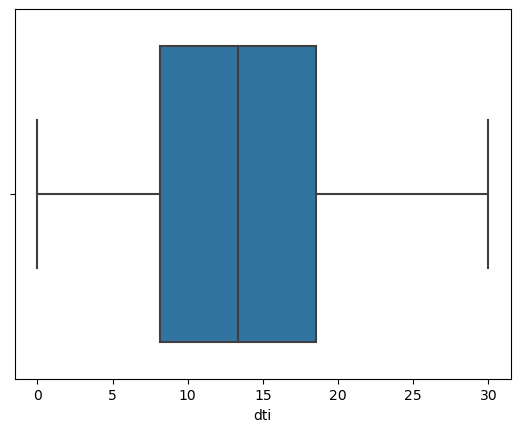

In [172]:
# loan data "dti" column outlier analysis.
sns.boxplot(loan_data.dti)

<AxesSubplot:xlabel='loan_amnt'>

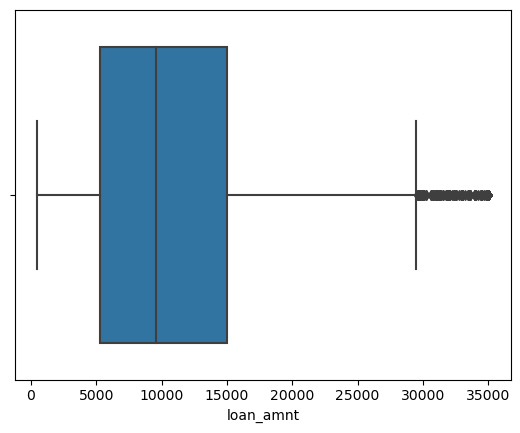

In [173]:
# loan data "loan_amt" outlier analysis.
sns.boxplot(loan_data.loan_amnt)

In [174]:
loan_data['loan_amnt'].quantile([0.75,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0])


0.75    15000.0
0.90    21600.0
0.91    23000.0
0.92    24000.0
0.93    25000.0
0.94    25000.0
0.95    25000.0
0.96    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

In [175]:
loan_data['funded_amnt_inv'].quantile([0.75,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0])

0.75    14000.000000
0.90    19975.000000
0.91    20325.000000
0.92    21572.172366
0.93    22903.262772
0.94    23945.810093
0.95    24506.582238
0.96    24950.000000
0.97    25828.061320
0.98    29890.414864
0.99    34721.583150
1.00    35000.000000
Name: funded_amnt_inv, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

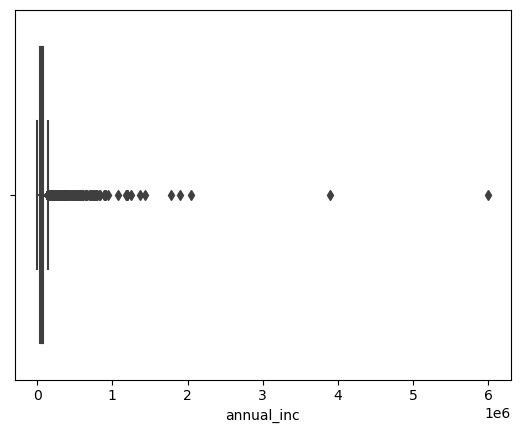

In [176]:
sns.boxplot(loan_data['annual_inc'])

In [177]:
loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

#### There are many outliers and they can affect our analysis.

We need to remove them by finding the quantile info and then take actions.
The values after 95th percentile are unevenly distributed and there is a bug spike in values in short percentile difference.
We can set the threshold to 95 percentile.

In [290]:
# Storing values only till 0.95 percentile.
loan_data = loan_data[loan_data.annual_inc <= loan_data['annual_inc'].quantile(0.95)]
plt.show()

<AxesSubplot:xlabel='annual_inc'>

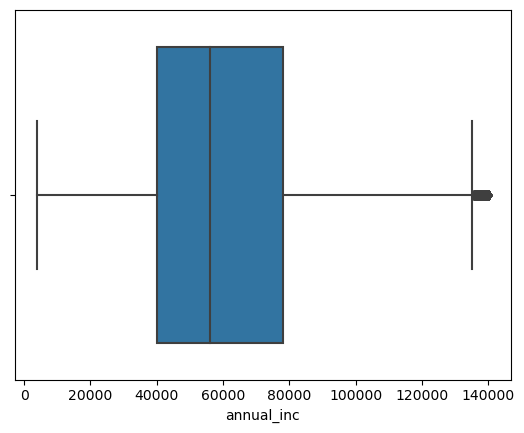

In [179]:
sns.boxplot(loan_data.annual_inc)

### Visualizing Categorical Data

These are some categorical columns.
<ul>
<li>home_ownership</li>
<li>purpose</li>
<li>grade</li>
<li>subgrade</li>
<li>emp_length</li>
</ul>

Numerical columns that can be converted to categorical columns for analysis.
<ul>
<li>int_rate</li>
<li>open_acc</li>
<li>revol_util</li>
<li>total_acc</li>
<li>annual_inc</li>
</ul>

#### Analysing home_ownership column.

In [180]:
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [181]:
loan_data['home_ownership'].value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

##### We will replace 'NONE' with 'OTHERS' since there are only 3 entries for 'NONE' and won't affect our analysis much.

In [187]:
loan_data['home_ownership'] = loan_data['home_ownership'].apply(lambda x: 'OTHER' if x == 'NONE' else x)

In [188]:
loan_data['home_ownership'].value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          94
Name: home_ownership, dtype: int64

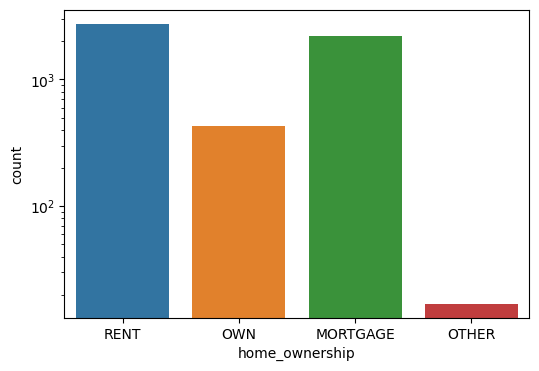

In [246]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()

#### Analysing purpose.

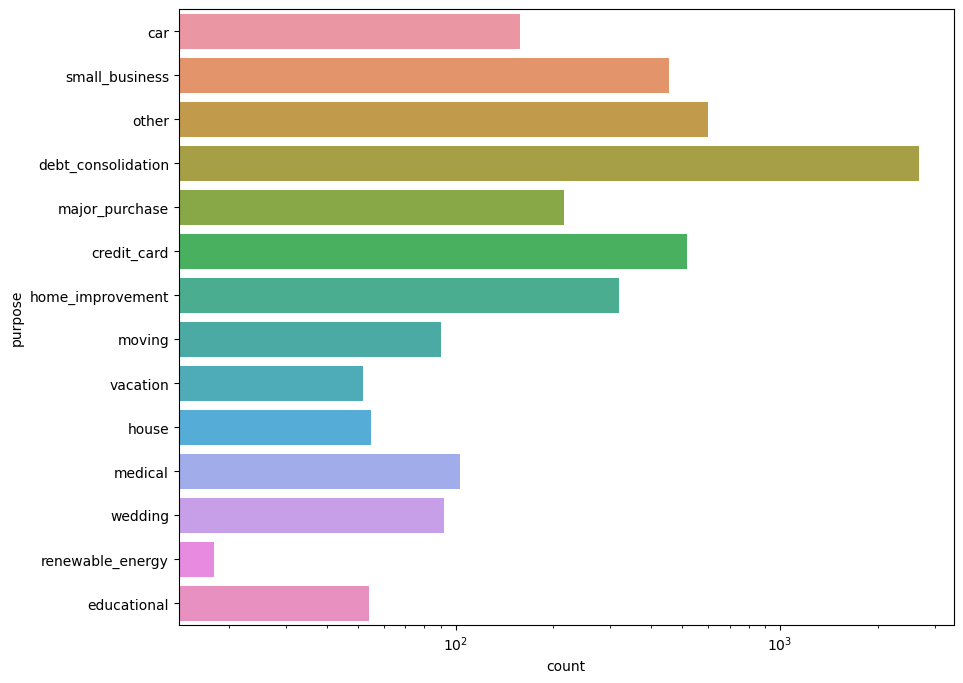

In [247]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.show()

#### Analysing grade and sub_grade together since they are related.

In [194]:
loan_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [195]:
loan_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

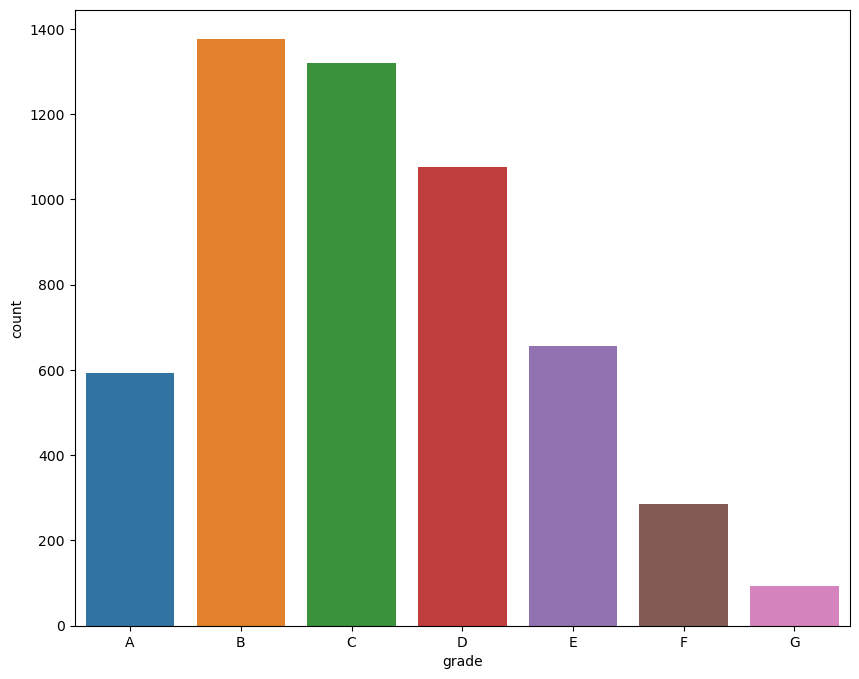

In [248]:
# Plotting grade
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.show()

In [198]:
# Convert sub_grade to mumeric value.
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))

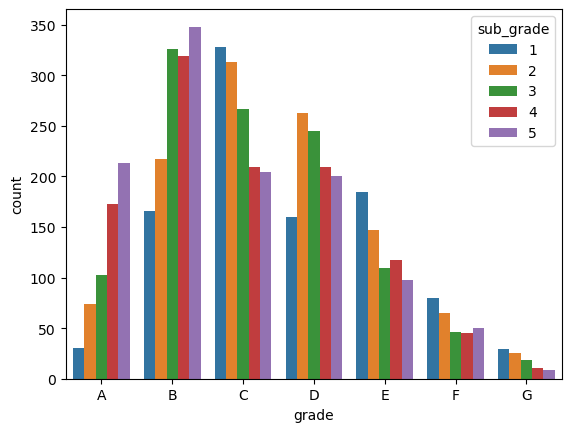

In [249]:
# Plotting grade with sub_grade.
sns.countplot(x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='sub_grade' ,data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.show()

#### Analyse emp_length

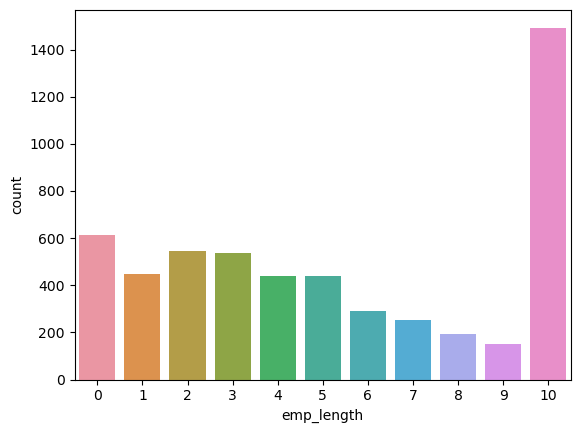

In [250]:
sns.countplot(x='emp_length', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.show()

#### Analysing numeric columns, best way to analyse them is to convert them to categorical columns.
##### Creating bins for these columns.

In [203]:
loan_data['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [205]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [208]:
# Display newly created bins.
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36,10.65,162.87,B,2,10,RENT,24000.0,...,3,0,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60,15.27,59.83,C,4,0,RENT,30000.0,...,3,0,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36,15.96,84.33,C,5,10,RENT,12252.0,...,2,0,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36,13.49,339.31,C,1,10,RENT,49200.0,...,10,0,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36,7.90,156.46,A,4,3,RENT,36000.0,...,9,0,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k


#### Analysing interest rate with help of newly created bins.

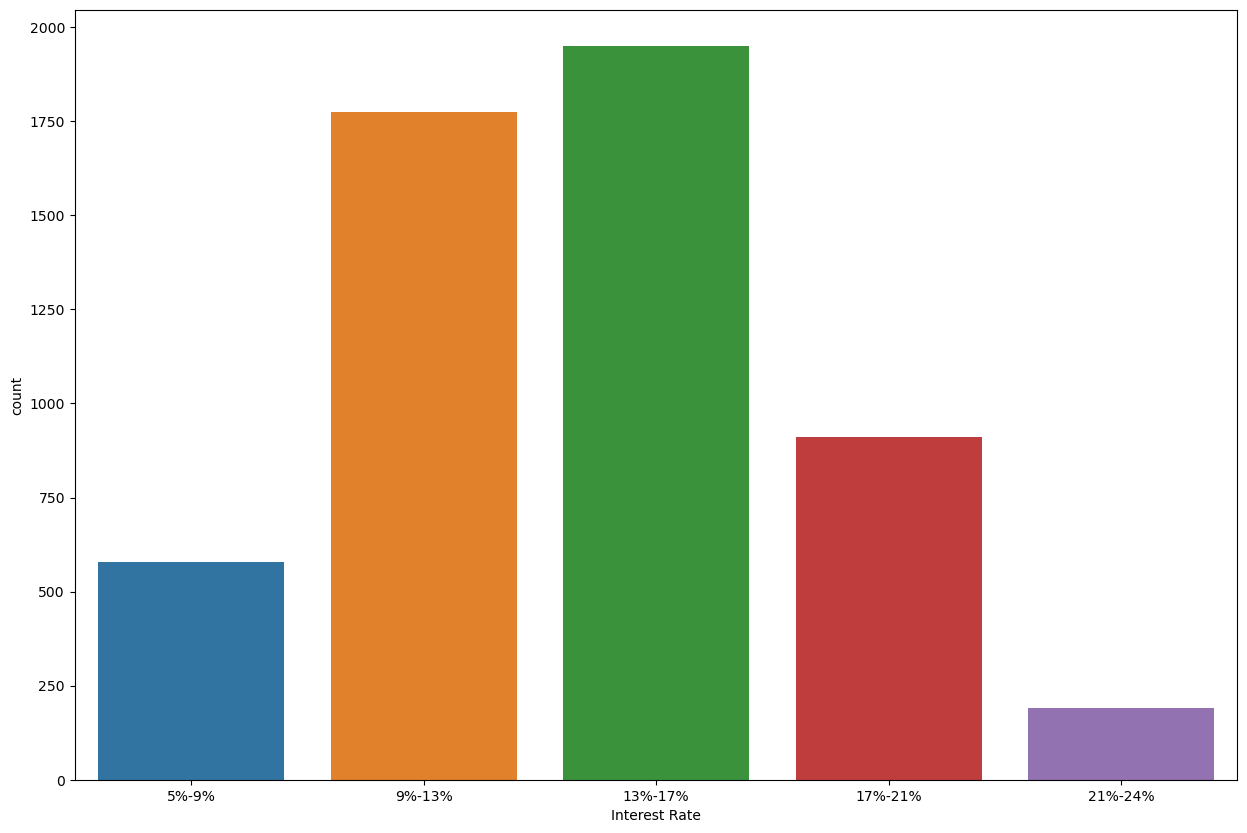

In [251]:
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.show()

#### Analysing open_acc

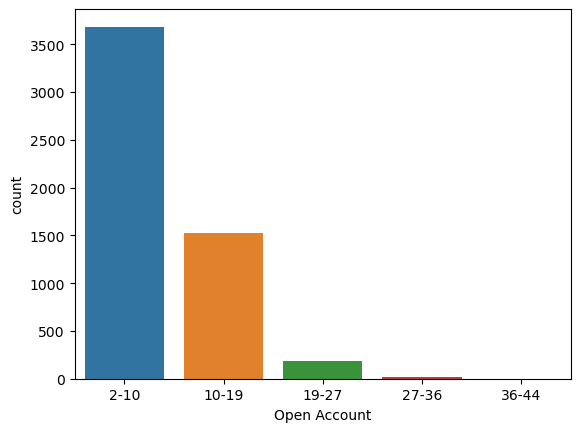

In [252]:
sns.countplot(x='open_acc_groups', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.xlabel('Open Account')
plt.show()

#### Analysing revol_util.


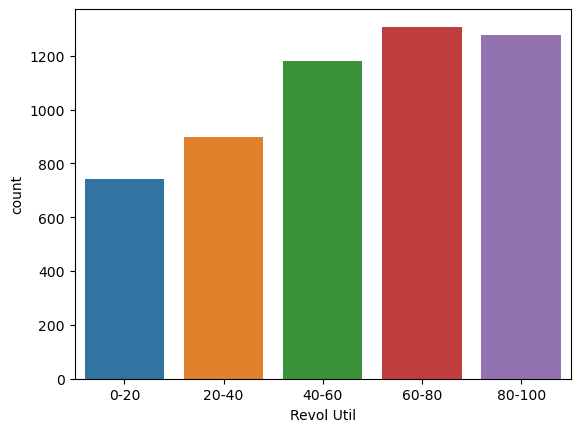

In [253]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.xlabel('Revol Util')
plt.show()

#### Analysing total_acc.

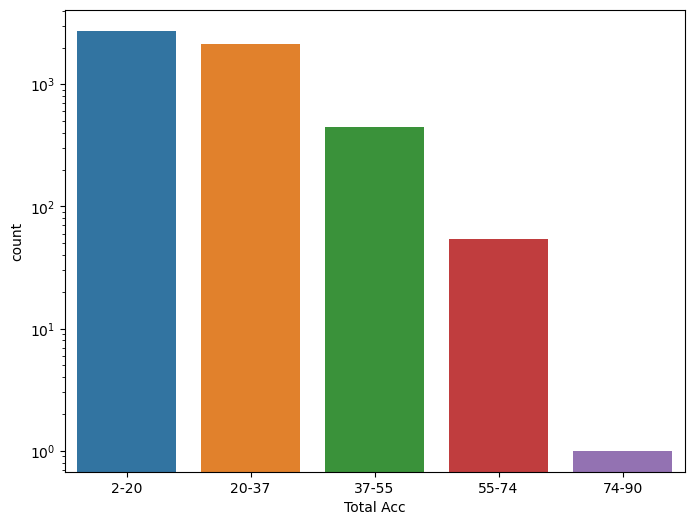

In [254]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.xlabel('Total Acc')
plt.show()

#### Analysing annual_inc.

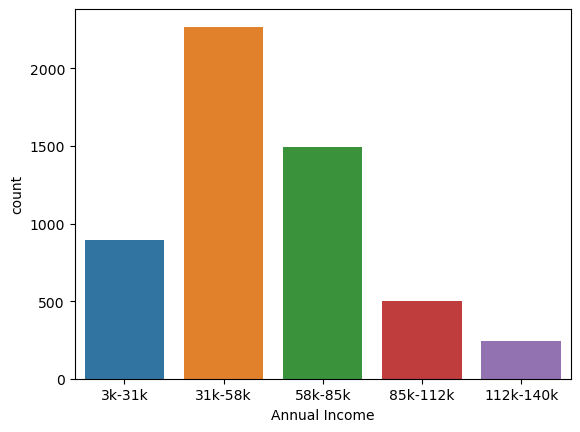

In [256]:
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data['loan_status'] == 'Charged Off'])
plt.xlabel('Annual Income')
plt.show()

#### Analysing term.

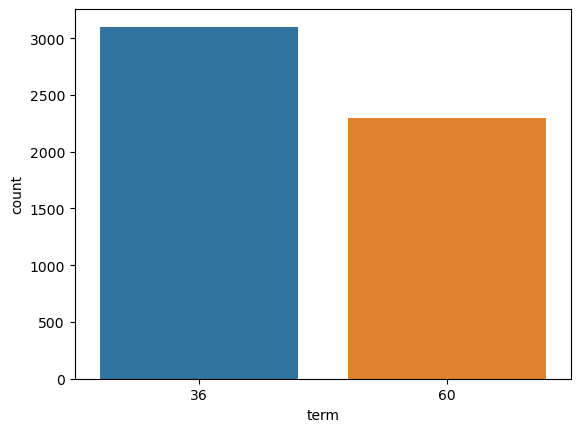

In [257]:
sns.countplot(x='term', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()

#### Analysing verification_status

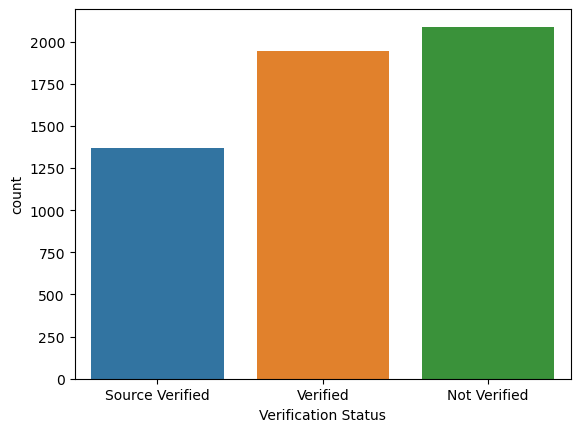

In [258]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.xlabel('Verification Status')
plt.show()

#### Analysing inq_last_6mths

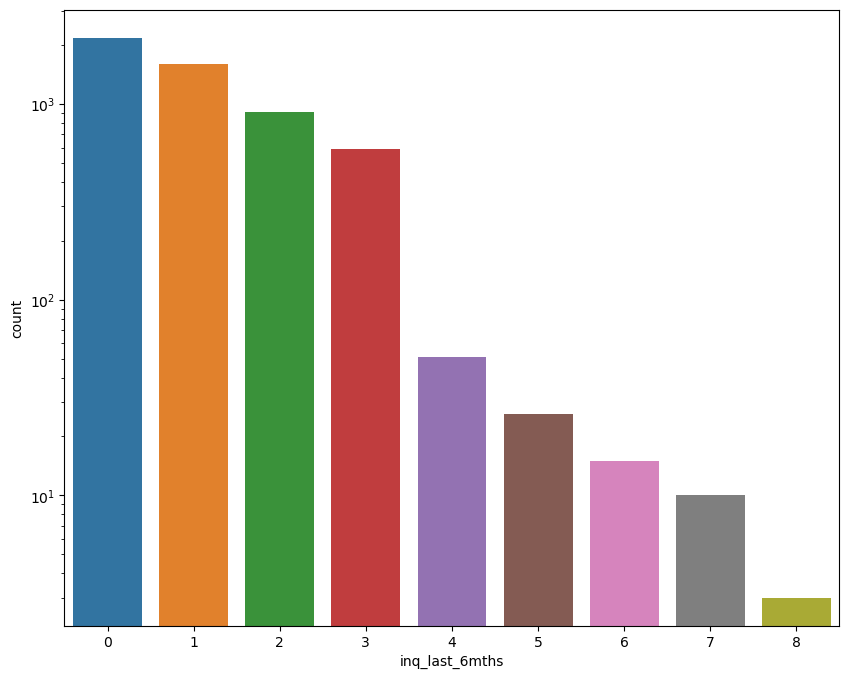

In [259]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()

#### Analysing pub_rec.

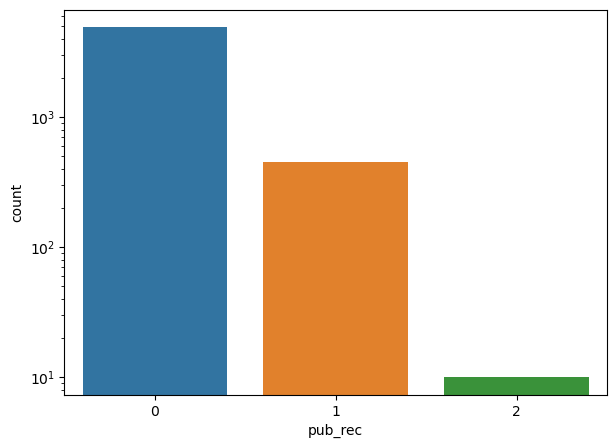

In [260]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()

#### Analysing defaulters by loan issued month and year.

In [227]:
loan_data['issue_d'].value_counts()

Dec-11    1967
Nov-11    1959
Oct-11    1809
Sep-11    1790
Aug-11    1700
Jul-11    1649
Jun-11    1616
May-11    1528
Apr-11    1496
Mar-11    1361
Jan-11    1321
Feb-11    1241
Dec-10    1209
Jul-10    1083
Nov-10    1076
Oct-10    1071
Sep-10    1030
Aug-10    1026
Jun-10     982
May-10     886
Apr-10     791
Mar-10     697
Feb-10     591
Nov-09     568
Jan-10     552
Dec-09     552
Oct-09     513
Sep-09     426
Aug-09     391
Jul-09     354
Jun-09     336
May-09     305
Apr-09     278
Mar-09     266
Feb-09     249
Jan-09     226
Mar-08     220
Dec-08     206
Nov-08     179
Feb-08     168
Jan-08     164
Apr-08     146
Oct-08      89
Dec-07      82
Jul-08      80
May-08      69
Aug-08      66
Jun-08      65
Oct-07      46
Nov-07      34
Sep-08      29
Aug-07      28
Jul-07      24
Sep-07      15
Jun-07       1
Name: issue_d, dtype: int64

In [229]:
# Since issue_d has month and year, we will extract month and year from this column.
loan_data['issue_month'] = loan_data['issue_d'].apply(lambda x: x.split('-')[0])
loan_data['issue_year'] = loan_data['issue_d'].apply(lambda x: x.split('-')[1])

In [231]:
loan_data.head()


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36,10.65,162.87,B,2,10,RENT,24000.0,...,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k,Dec,11
1,2500,2500.0,60,15.27,59.83,C,4,0,RENT,30000.0,...,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k,Dec,11
2,2400,2400.0,36,15.96,84.33,C,5,10,RENT,12252.0,...,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k,Dec,11
3,10000,10000.0,36,13.49,339.31,C,1,10,RENT,49200.0,...,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k,Dec,11
5,5000,5000.0,36,7.90,156.46,A,4,3,RENT,36000.0,...,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k,Dec,11


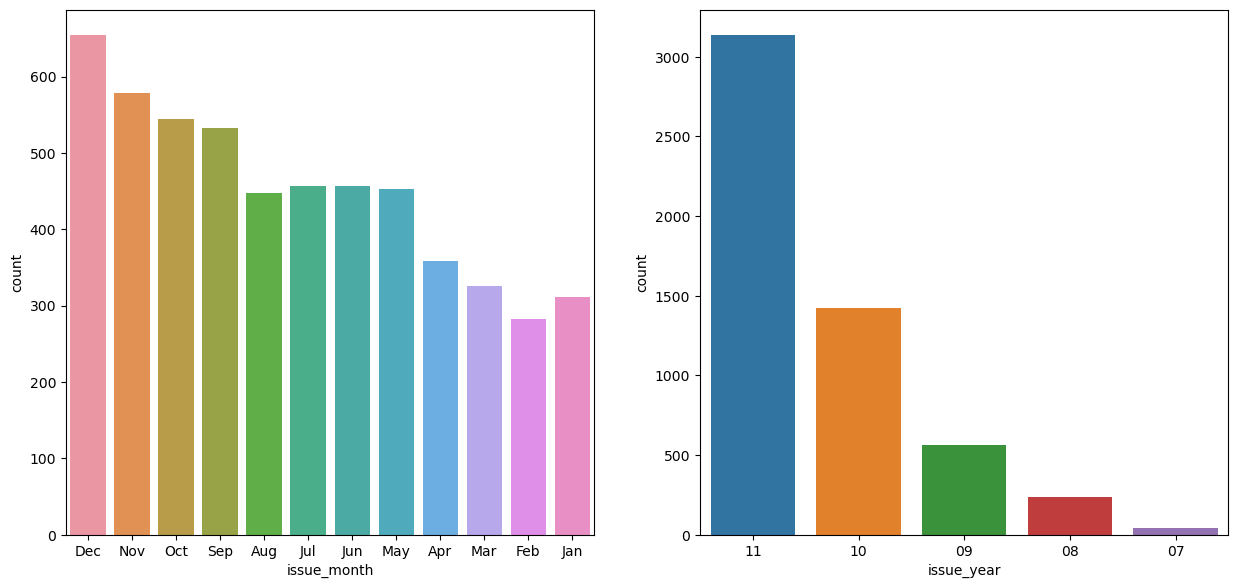

In [261]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.show()


#### Analysing funded_amnt_inv, installment, dti, loan_amnt

In [238]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

#### Analysing funded_amnt_inv

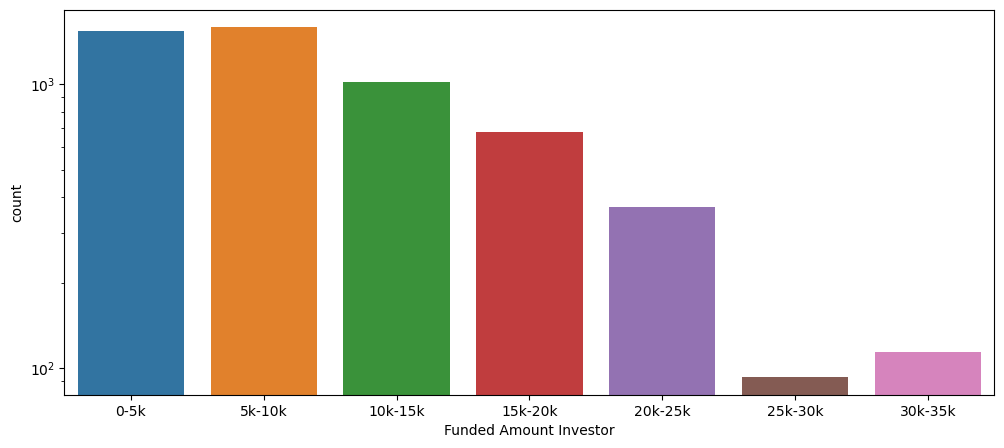

In [262]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.xlabel('Funded Amount Investor')
plt.show()

#### Analysing loan_amnt

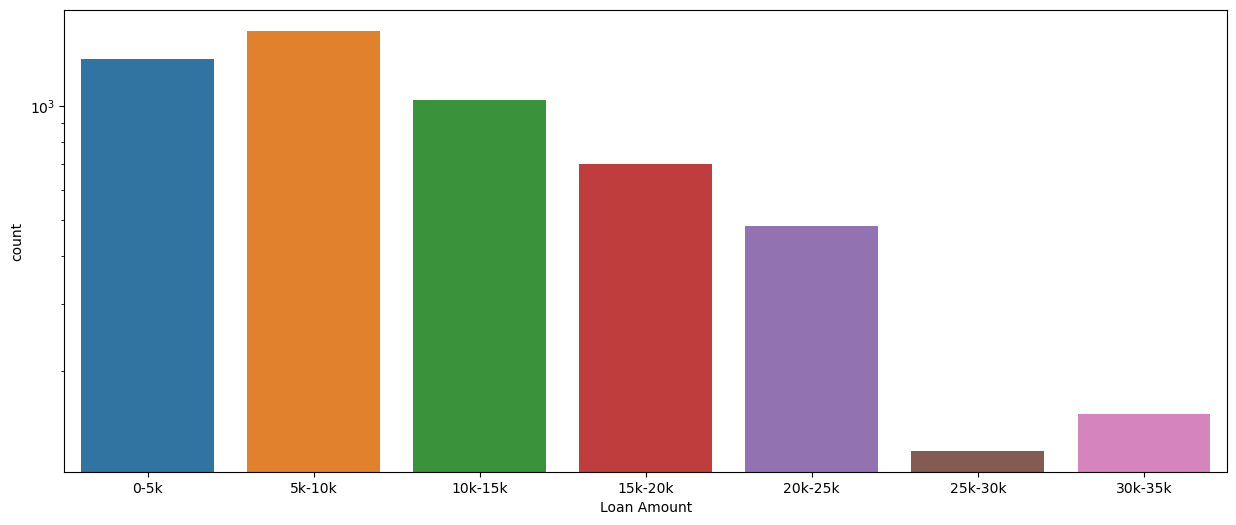

In [264]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.xlabel('Loan Amount')
plt.show()

#### Analysing dti

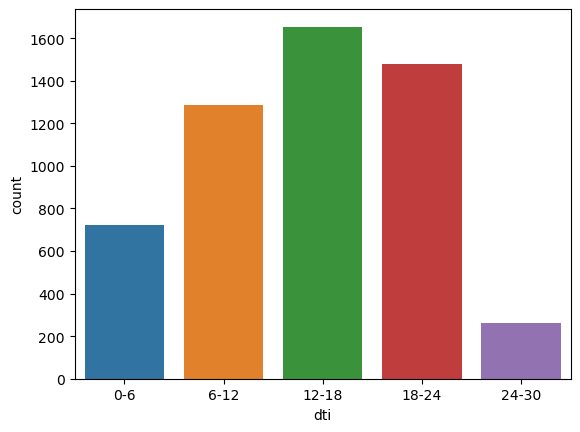

In [265]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.xlabel('dti')
plt.show()

#### Analysing installment

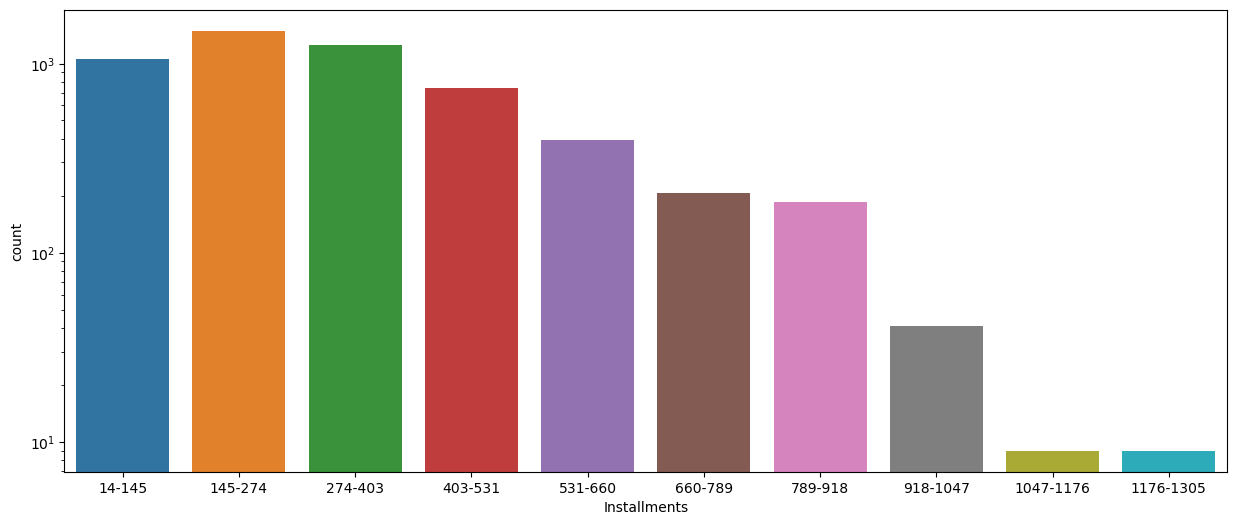

In [266]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.xlabel('Installments')
plt.show()

## Observations

In our analysis for the "Charged Off" loan_status category, these category of applications are more likely to default.

<ul>
<li>Applicants whose home ownership status is 'RENT'.</li>
<li>Applicants who took loan for the purpose of 'debt_consolidation'.</li>
<li>Applicants who belong to grade B and subgrade B5.</li>
<li>Applicants who has work experience of 10+ years.</li>
<li>Applicants whose interest rate fall in the range of 13-17%.</li>
<li>Applicants who have less accounts open.</li>
<li>Applicants whose annual income fall in range 31k to 58k.</li>
<li>Applicants whose loan tenure is 36 months.</li>
<li>Applicants whose verifications status is 'Not Verified'</li>
<li>Applicants who inquired 0 times in last 6 months for further loans.</li>
<li>Applicants whose pub_record is 0.</li>
<li>Applicants who took loan in year 2011 and in the month of December.</li>
<li>Applicants whose loan amount is in range 5k-10k.</li>
<li>Applicants whose dti is in range 12-18.</li>
<li>Applicants whose installments is in range 145-274.</li>
</ul>

#### There is an interesting observation is that applicants defalt most in the month of December, this may be due to expenses incurred during Christmas and New Year.

### Correlation Matrix.


In [267]:
numeric_columns = ['loan_amnt', 'funded_amnt_inv', 'revol_util', 'emp_length', 'open_acc', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec']
correlation_matrix = loan_data[numeric_columns].corr()

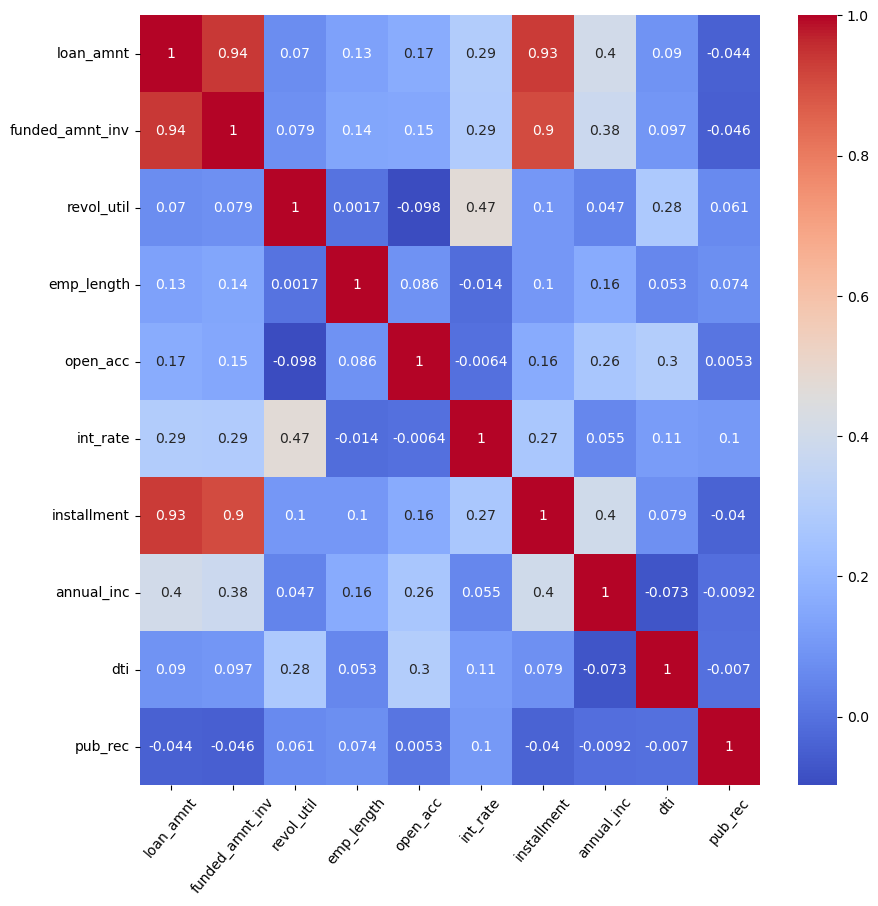

In [268]:
f,ax = plt.subplots(figsize= (10,10))

sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           cmap= 'coolwarm', annot = True)
plt.xticks(rotation=50)
plt.show()

### Bivariate Analysis (analysing the correlatio of two variables)

#### Analysing annual_income with othe columns.

##### 1.Annual income vs loan purpose

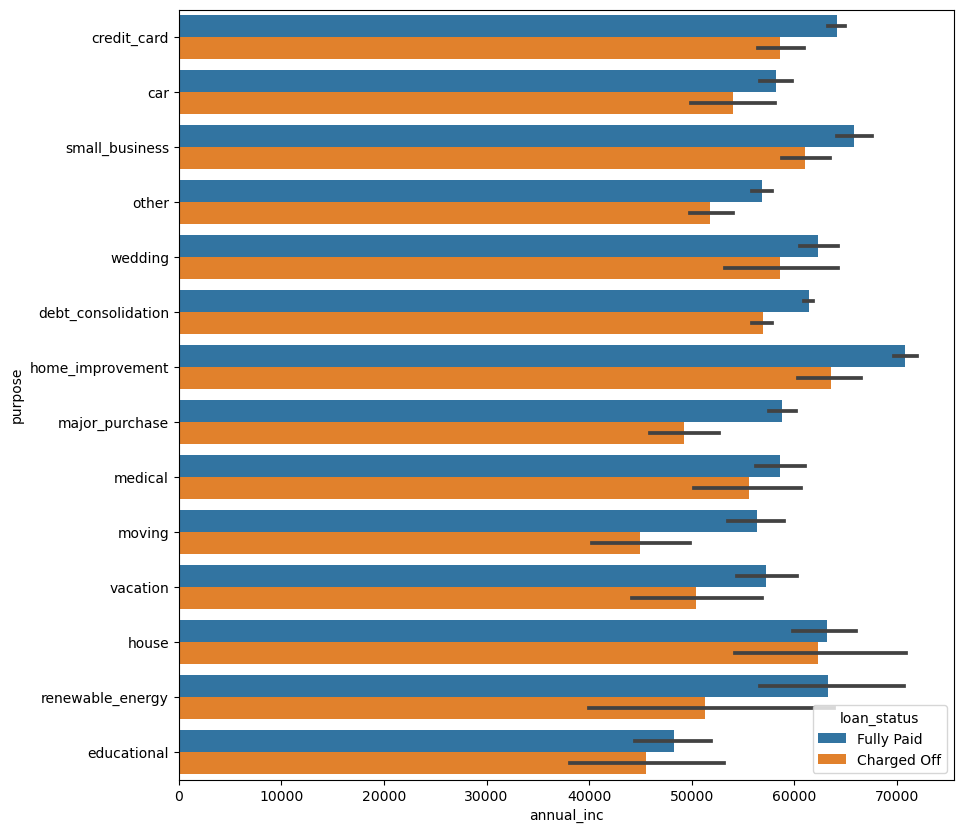

In [275]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan_data, x='annual_inc', y='purpose', hue='loan_status')
plt.show()

##### 2.Annual income vs home ownership.

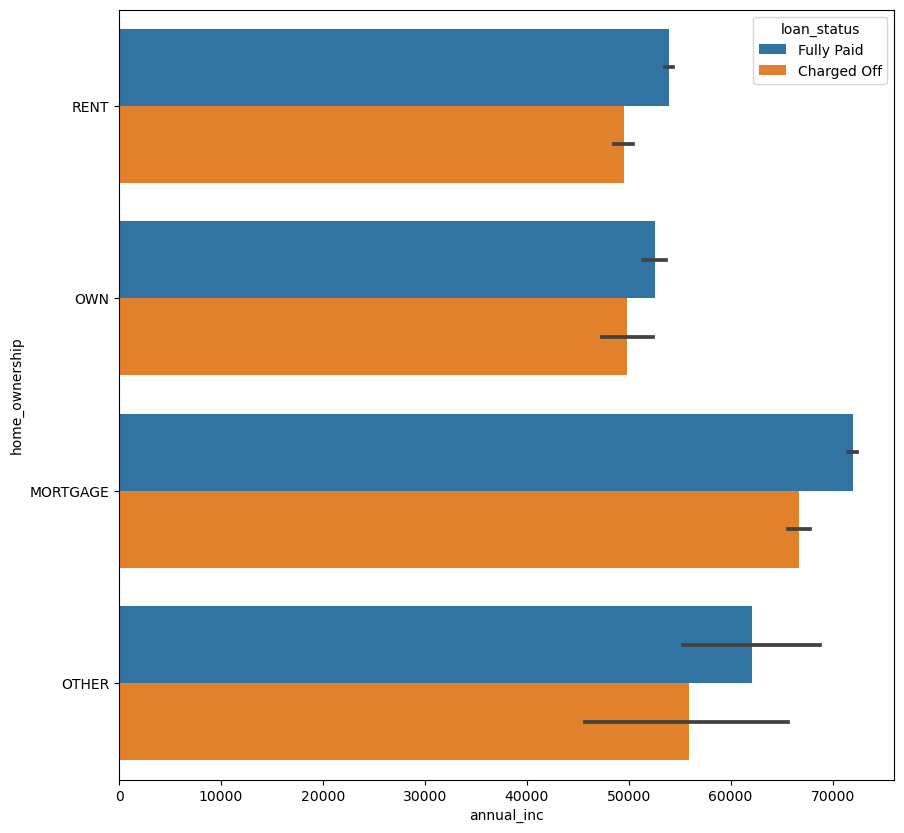

In [278]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan_data, x='annual_inc', y='home_ownership', hue='loan_status')
plt.show()

##### 3. Annual income vs int_rate

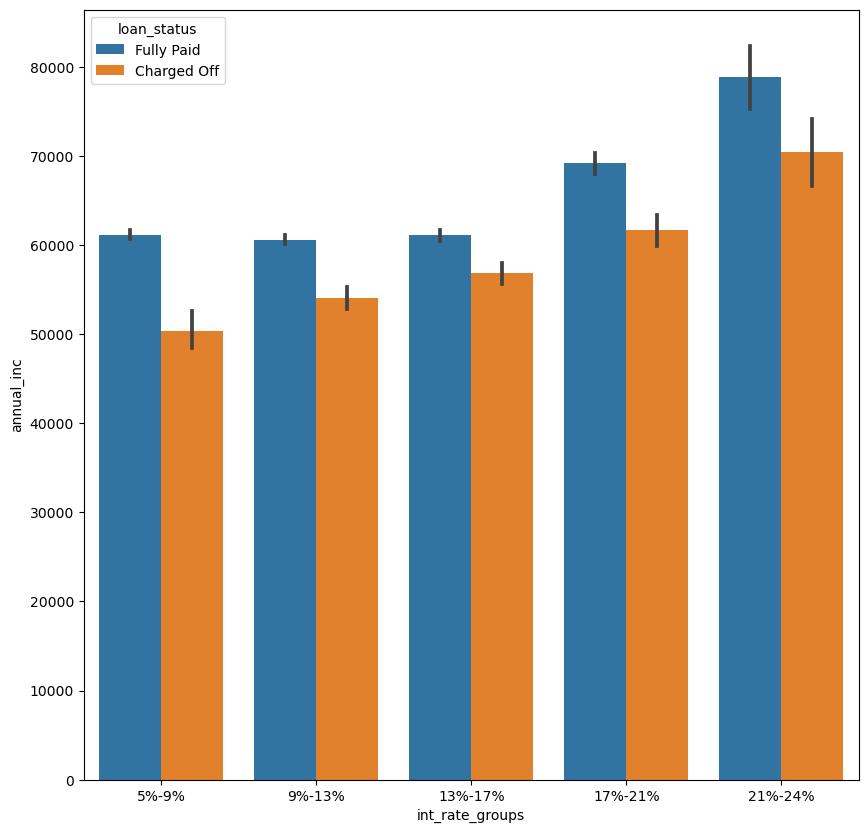

In [279]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status')
plt.show()

#### Analysing loan_amount with other columns.

##### Loan Amount vs Interest Rate.

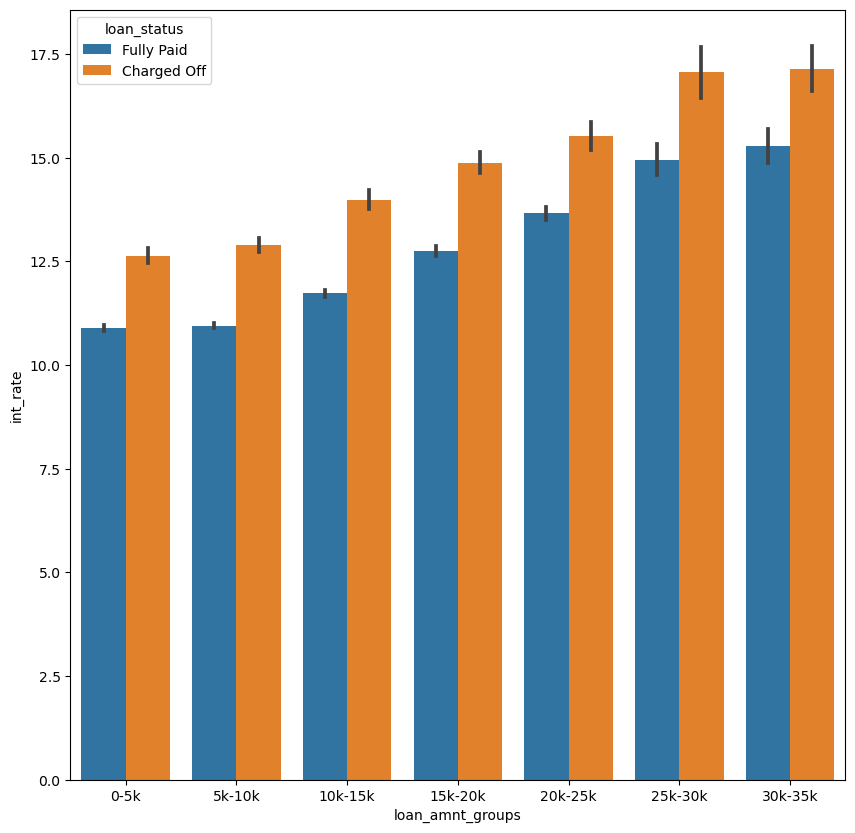

In [280]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.show()

##### 2.Loan Amount vs Loan Purpose.

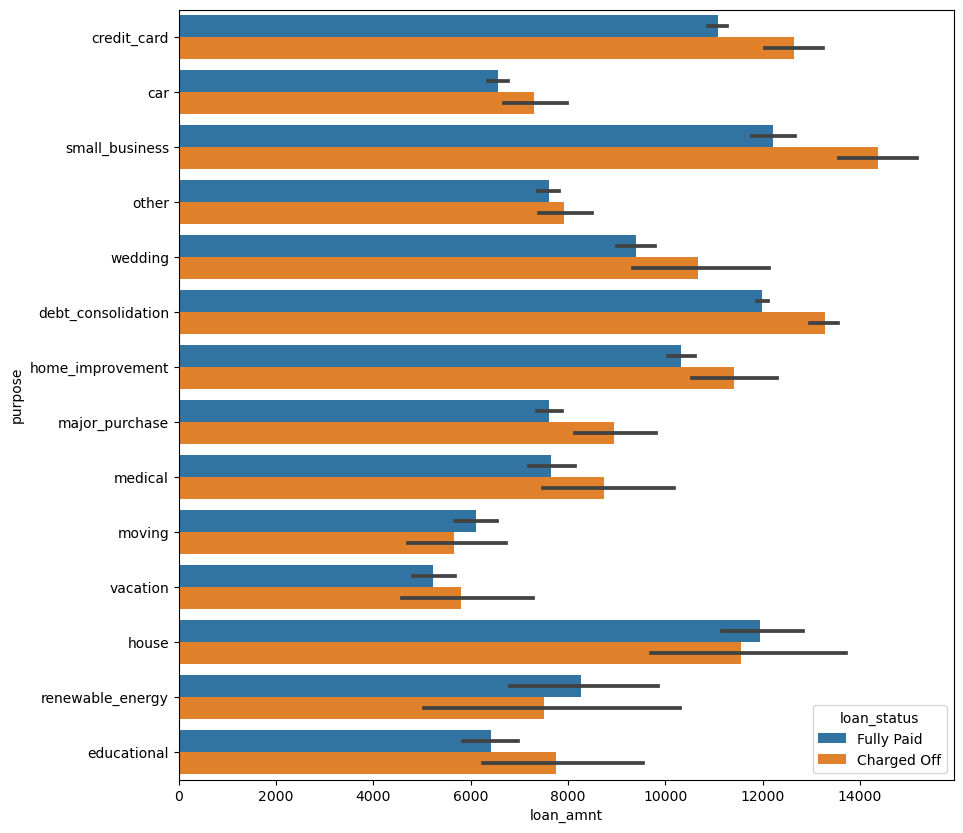

In [282]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

##### 3.Loan Amount vs House Ownership.

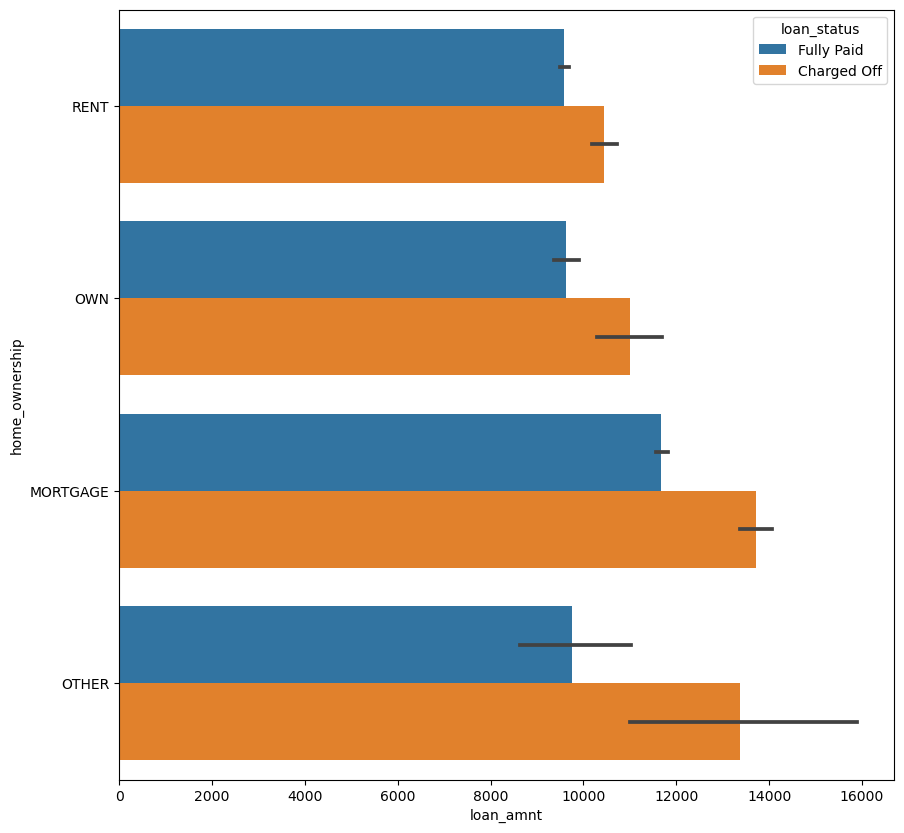

In [283]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()

##### 4.Loan Amount vs month and year issued.

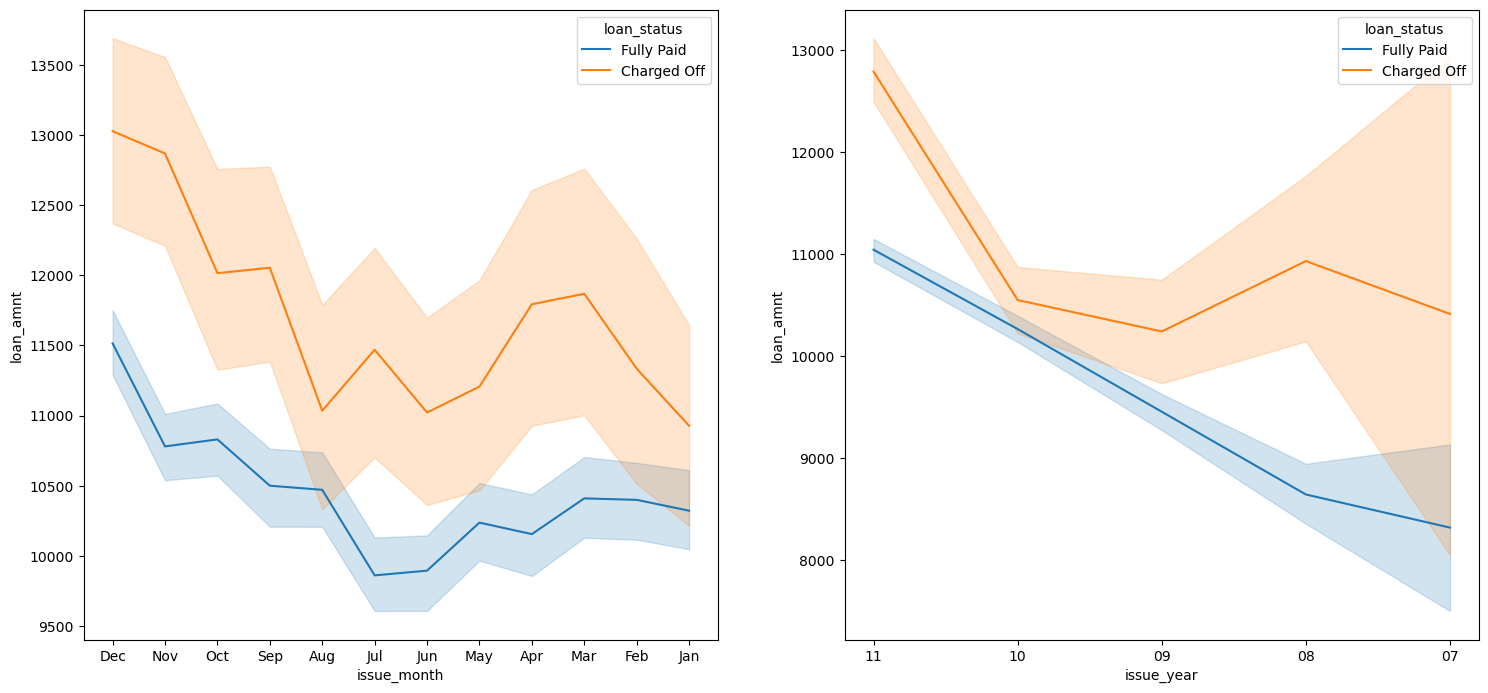

In [287]:
plt.figure(figsize=(18,18))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status')
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status')
plt.show()

##### 5.Loan Amount vs Verification Status.

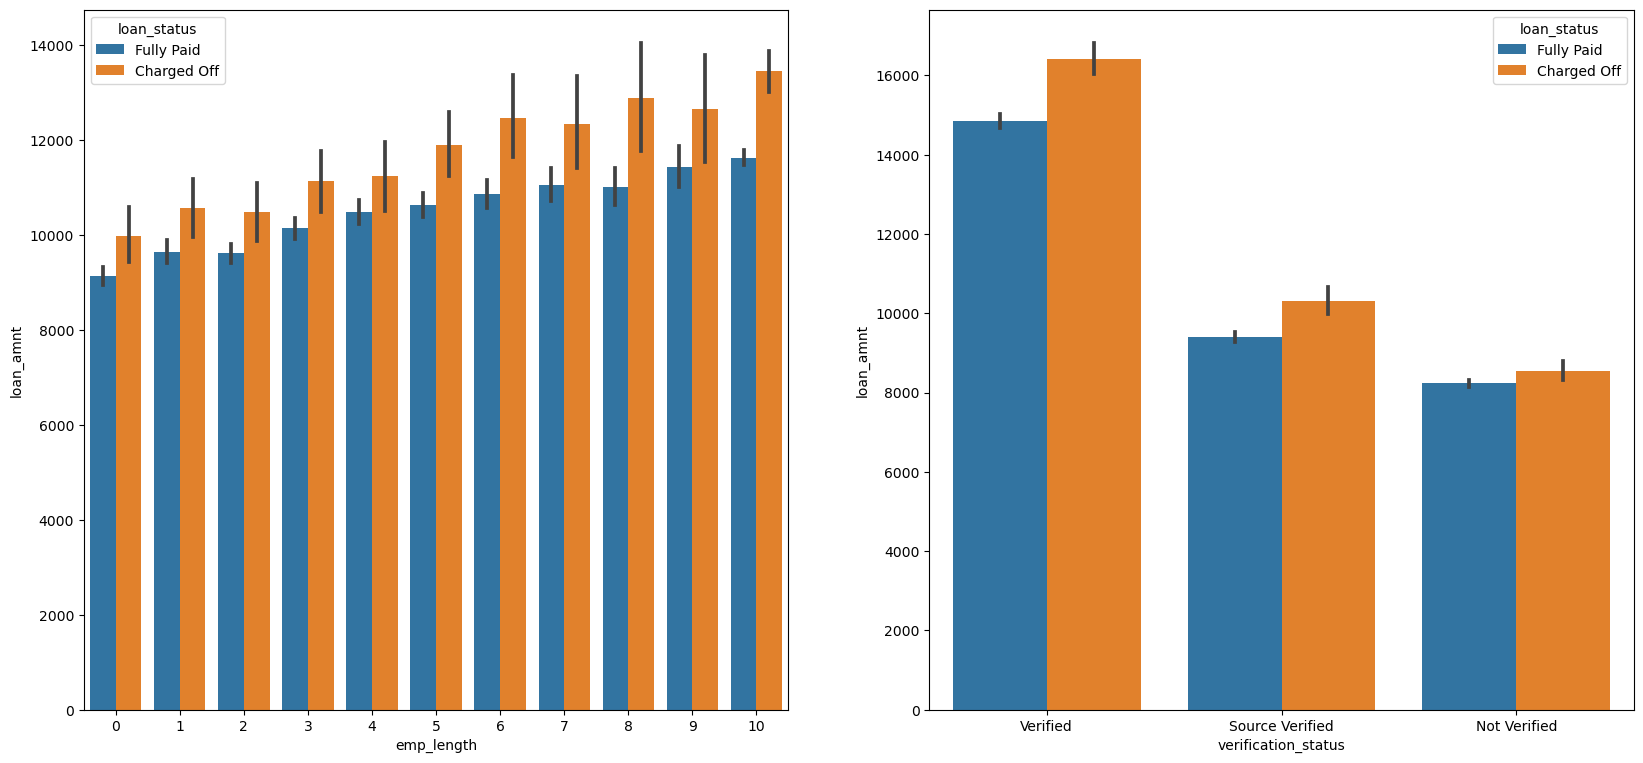

In [289]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status')
plt.show()

###Observations in correlating two columns.
These are the following correlations that are more likely to default.

<ul>
<li>Annual income in range 60k-70k and loan purpose is 'home_improvement'.</li>
<li>Annual income in range 60k-70k and home ownership status as 'MORTGAGE'.</li>
<li>Annual income in range 60k-70k and interest rate in range 21%-24%.</li>
<li>Loan amount in range 30k-35k and interest rate in range 15%-17.5%.</li>
<li>Loan amount in range 12k-14k and loan purpose is 'small_business'.</li>
<li>Loan amount in range 12k-14k and home ownership is either 'MORTGAGE' or 'OTHER'.</li>
<li>Loan amount in range 12k-14k and loan amount is greater than 16k.</li>
</ul>
